# Why people leave their current positions? _[Dataset](https://www.kaggle.com/ludobenistant/hr-analytics)_
# What can employers do to keep their employees stay?

### What this notebook for?

In the previous "Basic Exploration" notebook, we have already covered basic explorations of why people are leaving based on single feature. In this notebook, we will continue exploring the data set based on combined features rather than single ones. More new features would be created in the following exploration.

Importing necessary libraries:

In [3]:
#import necessary packages and load dataset
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Loading and transforming dataset:

In [4]:
%run load.py
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,avg_hour_project
0,0.0,0.0,2,0,3,0,1,0,0,0,1.0
1,2.0,2.0,5,2,6,0,1,0,0,1,0.0
2,0.0,2.0,7,2,4,0,1,0,0,1,0.0
3,2.0,2.0,5,1,5,0,1,0,0,0,0.0
4,0.0,0.0,2,0,3,0,1,0,0,0,1.0


Creating functions for convience:

In [6]:
def kdeplot(data, column):
    g = sns.FacetGrid(data, hue="left",aspect=4)
    g.map(sns.kdeplot,column,shade= True);
    g.set(xlim=(0, data[column].max()));
    g.add_legend()
    
def boxplot(data, column):
    g = sns.FacetGrid(data, col = 'left')
    g.map(sns.boxplot, column);
    
def barplot(data, column):
    sns.barplot(x = column, y = 'left', data = data)
    sns.plt.title('Left over {} (barplot)'.format(column))
    
def factorplot(data, column):
    sns.factorplot(x = column, y = 'left', data = data, size = 5)
    sns.plt.title('Left over {} (factorplot)'.format(column))
    
def barplothue(data, column, hue):
    sns.barplot(x = column, y = 'left', hue = hue, data = data)

def barplot_subplot(data, column, hues, ncol, nrow):
    fig, axs = plt.subplots(ncols = ncol, nrows = nrow, figsize = (12, 8))
    
    i = 0
    j = 0
    for hue in hues:
        sns.barplot(x = column, y = 'left', data = data, hue = hue, ax = axs[i][j])
        #sns.plt.title('Left over {} with hue {} (barplot)'.format(column, hue))
        j += 1
        if j >= ncol:
            i += 1
            j = 0
            continue
    fig.tight_layout()

### Plots: satisfaction_level vs. the others

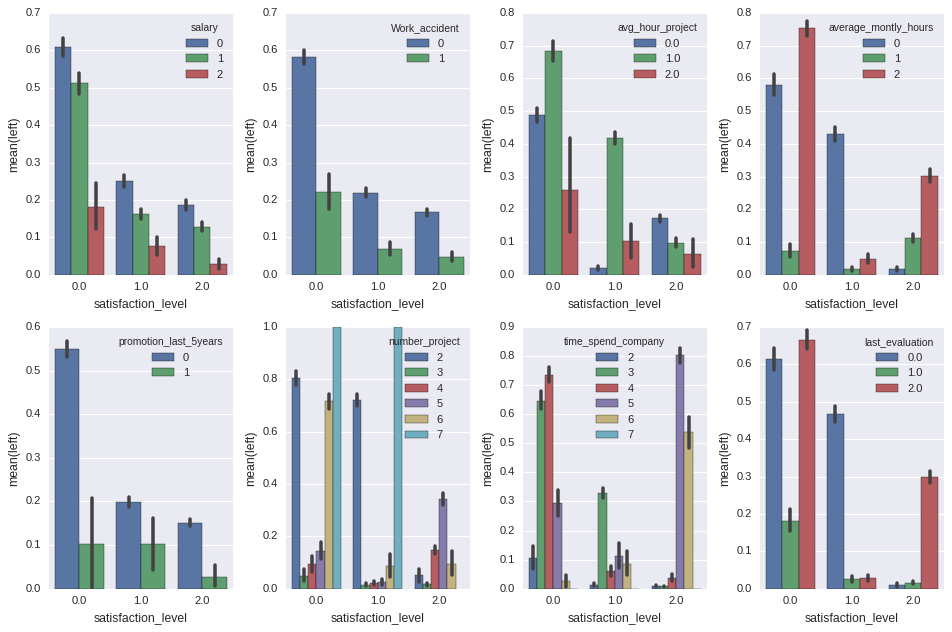

In [52]:
barplot_subplot(data, 'satisfaction_level', 
                ['salary', 'Work_accident', 'avg_hour_project', 'average_montly_hours', 
                 'promotion_last_5years', 'number_project', 'time_spend_company', 'last_evaluation'], 
                4, 2)

### Tons of information can be explored here:
1. from all plots above: the higher the satisfaction level, the less likely the are going to leave;
2. from the first(1, 1) plot, people with both high satisfaction level and high salary are less likely to leave than any other groups of people, increasing salary and satisfaction level may be one way to keep the employee stay;
3. from (1, 1), people with low satisfaction level and low or medium salary are much more likely to leave, they may leave for better opportunities;
4. from (1, 2), it is surprised that people who have work accident are not likely to leave --- actually, they are more possible to stay!
5. from (1, 3), which use the feature we created (avg_hour_project, which imply employees' working efficiency), things could be very interesting if we treat three groups seperately:
   * for the high satisfaction group, the result is pretty straitforward that the higher the work efficiency, the lower the leaving rate;
   * for the medium satisfaction group, it is really strange that people with low work efficiency are much less possible to leave. While people with medium work efficiency are way more likely to leave;
   * for the low satisfaction group, people with more likely to leave are those who are with low and medium work efficiency. These people may be pushed to leave because of the lower work efficiency.
6. from (1, 3), there's also another interesting finding: people with medium work efficiency are much more likely to leave. One of reason why they leave may be chasing better opportunities. They think they should have a better job based on their abilities. It is easy to understand that people in middle class are always the ones who want to be top guys.
7. from (1, 4), fingdings are even more significant:
   * for high satisfaction group, the more average monthly hours they spend, they more likely they leave. The reason behind is, people who are both satisfied with their job and working hard are definitely those who employers want to keep them stay. But also because of their hard-working, they deserve better positions. Therefore, although employers would like them to stay, these people are really not likely to stay.
   * for medium satisfaction group, it is more straightforward that, for low average monthly hours group, they may not want to leave but are pushed to leave.
   * for low satisfaction group, things are more interesting because the two major groups are totally different:
     * for those who are not hard-working, they may be pushed to leave or they do not like their job at all. However, if they leave just because they do not like their job, they may not have a sence of resbonsibility. Let me explain this a little more: when we have a job, whether we like it or not, we need to try our best to do our jobs. Of course we can leave if we don't like the job, but it is our resbonsibility to do our job. That's what we have to do. Another reason for their leaving could be they do not have many works to do as they expected, therefore they feel frustrated and decide to leave for better opportunities
     * for those who are really working hard, they may leave for better opportunities.

### Plots: salary vs. the others

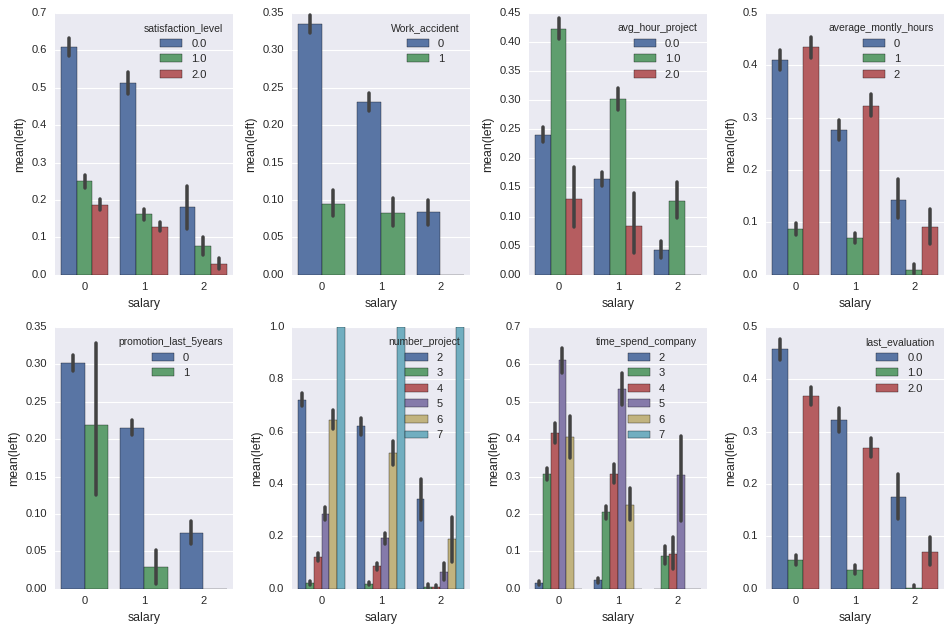

In [53]:
barplot_subplot(data, 'salary', 
                ['satisfaction_level', 'Work_accident', 'avg_hour_project', 'average_montly_hours', 
                 'promotion_last_5years', 'number_project', 'time_spend_company', 'last_evaluation'], 
                4, 2)

### Who would like to leave?

1. People with lower salary and lower satisfaction are more likely to leave. satisfaction_level seems more important than salary;
2. People with low salary and medium working efficiency are more likely to leave;
3. People who was not promoted in last 5 years and are with lower salary are more likely to leave. Lower salary shows they are not essential for companies while no promotion indicates they may not perform well on their positions.
4. People who with lower salary and lower evaluation are more likely to leave. While those who are with high evaluation and lower salary are also more likely to leave. Since high evaluation indicates they are great in their positions, they may leave for higher salary they deserve.

# Recommandations for companies:

1. Increasing salary and employee's satisfaction is always a good way to keep them stay;
2. For those who spend more time on work in average and who have high evaluation scores, they can be treated as 'industrious' employees. Employers should recognize this group of people and keep them stay -- to provide higher salary and assign them with more important roles.
3. Always keep an eye on those who spend 4,5 or 6 years at the company. The main reason why they are leaving is pursuing better opportunities. High 'salary' do not mean too much for them, since lower satisfaction level plays an more important role of their leaving. Therefore, my suggestion is, make them feel happy at their position. They don't need more money, they just need to be well-treated -- they need to feel they are important for this company.
4. Do not 